# H&M's Group Project

## Anwering the question: How has the total number of Space Missions changed over time?
### -- Analysis--

In [1]:
# Bring in the Dependencies
import pandas as pd 
import numpy as np
import hvplot.pandas
from unidecode import unidecode
import matplotlib.pyplot as plt

In [2]:
file_path = "Resources/SpaceMission_Merged.csv"
encoding =  "ISO-8859-1"
missions_df = pd.read_csv(file_path, encoding=encoding)

#File path for Nasa's Budget csv
file_path_budget = "Resources/Nasa_Budget_ConstantDlls.csv"
budget_df = pd.read_csv(file_path_budget)

#File path for Country-Lat-Lon-Missions csv
file_path_worldmap = "Resources/Country_LatLon_Missions.csv"
world_map_missions = pd.read_csv(file_path_worldmap)


In [3]:
#show the DataFrame sample
missions_df.head()

,Company,Date,Time,Rocket,Mission,RocketStatus,MissionStatus,Day/Night Launch,Complex ID,Launch Site,Territory,Country
0,US Navy,1957-12-06,16:44:00,Vanguard,Vanguard TV3,Retired,Failure,Day,LC-18A,Cape Canaveral AFS,Florida,USA
1,AMBA,1958-02-01,03:48:00,Juno I,Explorer 1,Retired,Success,Night,LC-26A,Cape Canaveral AFS,Florida,USA
2,US Navy,1958-02-05,07:33:00,Vanguard,Vanguard TV3BU,Retired,Failure,Day,LC-18A,Cape Canaveral AFS,Florida,USA
3,AMBA,1958-03-05,18:27:00,Juno I,Explorer 2,Retired,Failure,Night,LC-26A,Cape Canaveral AFS,Florida,USA
4,US Navy,1958-03-17,12:15:00,Vanguard,Vanguard 1,Retired,Success,Day,LC-18A,Cape Canaveral AFS,Florida,USA


In [4]:
#Check the dtypes for this DataFrame
missions_df.dtypes

Company             object
Date                object
Time                object
Rocket              object
Mission             object
RocketStatus        object
MissionStatus       object
Day/Night Launch    object
Complex ID          object
Launch Site         object
Territory           object
Country             object
dtype: object

To answer the question of how many space missions have happened over time, we have to
change the datatype of column 'Date', into datetime.


In [5]:
# Convert 'Date' column to datetime format
missions_df['Date'] = pd.to_datetime(missions_df['Date'])

In [6]:
#Check the dtypes to confirm the Date to datetime change
missions_df.dtypes

Company                     object
Date                datetime64[ns]
Time                        object
Rocket                      object
Mission                     object
RocketStatus                object
MissionStatus               object
Day/Night Launch            object
Complex ID                  object
Launch Site                 object
Territory                   object
Country                     object
dtype: object

## Space Missions Over Time

In [7]:
# Extract year from the 'Date' column using the dt accessor with .year for the year component
# and create a 'Year' column to store those values
missions_df['Year'] = missions_df['Date'].dt.year

# Set the 'Year' column as the index of the DataFrame
missions_df.set_index('Year', inplace=True)

In [8]:
#Show the modified DataFrame displaying the 'Year' column
missions_df.head()

,Company,Date,Time,Rocket,Mission,RocketStatus,MissionStatus,Day/Night Launch,Complex ID,Launch Site,Territory,Country
Year,,,,,,,,,,,,
1957,US Navy,1957-12-06,16:44:00,Vanguard,Vanguard TV3,Retired,Failure,Day,LC-18A,Cape Canaveral AFS,Florida,USA
1958,AMBA,1958-02-01,03:48:00,Juno I,Explorer 1,Retired,Success,Night,LC-26A,Cape Canaveral AFS,Florida,USA
1958,US Navy,1958-02-05,07:33:00,Vanguard,Vanguard TV3BU,Retired,Failure,Day,LC-18A,Cape Canaveral AFS,Florida,USA
1958,AMBA,1958-03-05,18:27:00,Juno I,Explorer 2,Retired,Failure,Night,LC-26A,Cape Canaveral AFS,Florida,USA
1958,US Navy,1958-03-17,12:15:00,Vanguard,Vanguard 1,Retired,Success,Day,LC-18A,Cape Canaveral AFS,Florida,USA


In [9]:
# Get the unique values of the 'Year' column
unique_years = missions_df.index.unique()

print(unique_years)

Index([1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968,
       1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020, 2021, 2022],
      dtype='int32', name='Year')


In [10]:
# Apply groupby to DataFrame by year, and count the number of missions for each year
missions_by_year = missions_df.groupby('Year').size()

In [11]:
# Find the first and last year in the dataset
first_year = unique_years.min()
current_year = unique_years.max()

# Print the information
print(f"Space Missions in this Dataset start from {first_year} - {current_year}")


Space Missions in this Dataset start from 1957 - 2022


In [31]:
# Get unique values from the 'Country' column
unique_countries = missions_df['Country'].unique()

# Print the unique countries
print(unique_countries)

['USA' 'Kazakhstan' 'Russia' 'France' 'Japan' 'Kenya' 'Australia' 'China'
 'India' 'Israel' 'Gran Canaria' 'Brazil' 'Barents Sea' 'North Korea'
 'Pacific Ocean' 'Iran' 'South Korea' 'New Zealand']


In [32]:
#Make a copy of the dataframe
missions_percountry1 = missions_df.copy()

In [35]:
# Group the dataframe by 'Country' and aggregate missions into a list
missions_by_country = missions_percountry1.groupby('Country').size().reset_index(name='Missions')

#Set the country index 
missions_by_country = missions_by_country.set_index('Country')

#Sort the Missions column in descending order
missions_by_country = missions_by_country.sort_values(by='Missions', ascending=False)

# Display the dataframe
missions_by_country

,Missions
Country,
USA,1472
Russia,1416
Kazakhstan,719
China,368
France,318
Japan,130
India,82
Pacific Ocean,36
New Zealand,28


In [12]:
# Calculate the size of points based on the number of missions
world_map_missions['Point_Size'] = world_map_missions['Missions']

# Create the hvplot
plot = world_map_missions.hvplot.points(
    'Longitude',
    'Latitude', 
    s='Missions', 
    color='Country',
    scale= 0.8,
    hover_cols=['Country', 'Missions'], 
    title='Number of Missions per Country', 
    xlabel='Longitude', 
    ylabel='Latitude',
    geo = True, 
    tiles="OSM")

# Show the plot
plot

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (Country,Missions)

Total number of Space Missions Worldwide (1957-2022): 4630


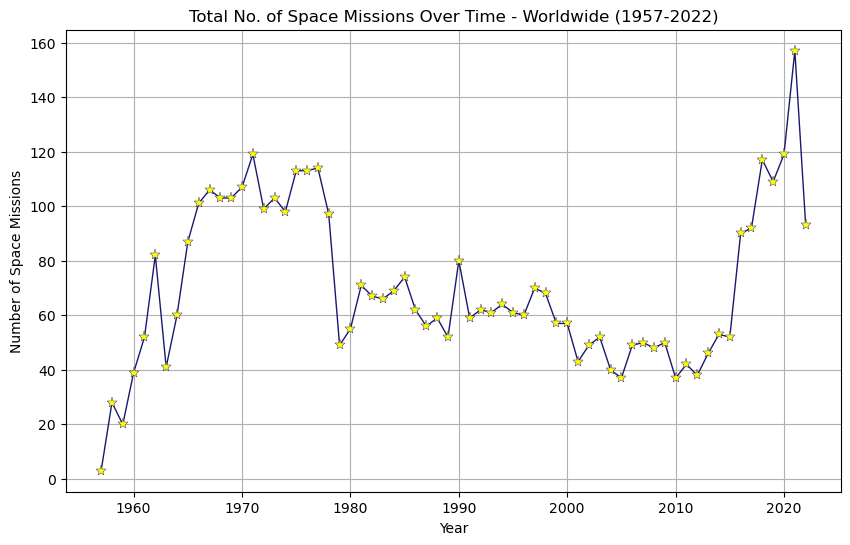

In [13]:
# Plot total number of missions over time
plt.figure(figsize=(10, 6))
missions_by_year.plot(kind='line', marker='*', color='MidnightBlue', 
                      markerfacecolor='yellow', linewidth=1, markersize=8, 
                      markeredgewidth=0.3)
plt.title('Total No. of Space Missions Over Time - Worldwide (1957-2022)')
plt.xlabel('Year')
plt.ylabel('Number of Space Missions')
plt.grid(True)

# Count the total number of missions for the USA
total_missions_worldwide = len(missions_df)
print(f'Total number of Space Missions Worldwide (1957-2022): {total_missions_worldwide}')


plt.show()

## Total Space Missions Over Time for the USA only


In [14]:
# Create a new DataFrame where the missions are pertaining the 'USA' only
usa_missions_by_year = missions_df[missions_df['Country'] == 'USA']

usa_missions_by_year.head()

,Company,Date,Time,Rocket,Mission,RocketStatus,MissionStatus,Day/Night Launch,Complex ID,Launch Site,Territory,Country
Year,,,,,,,,,,,,
1957,US Navy,1957-12-06,16:44:00,Vanguard,Vanguard TV3,Retired,Failure,Day,LC-18A,Cape Canaveral AFS,Florida,USA
1958,AMBA,1958-02-01,03:48:00,Juno I,Explorer 1,Retired,Success,Night,LC-26A,Cape Canaveral AFS,Florida,USA
1958,US Navy,1958-02-05,07:33:00,Vanguard,Vanguard TV3BU,Retired,Failure,Day,LC-18A,Cape Canaveral AFS,Florida,USA
1958,AMBA,1958-03-05,18:27:00,Juno I,Explorer 2,Retired,Failure,Night,LC-26A,Cape Canaveral AFS,Florida,USA
1958,US Navy,1958-03-17,12:15:00,Vanguard,Vanguard 1,Retired,Success,Day,LC-18A,Cape Canaveral AFS,Florida,USA


In [15]:
# To proceed and plot only missions pertaining to the 'USA' over time
# Groupby the USA launches DataFrame by year, and count the number of launches for each year
usa_missions_grouped = usa_missions_by_year.groupby('Year').size()

Total number of Space Missions USA only (1957-2022): 1472


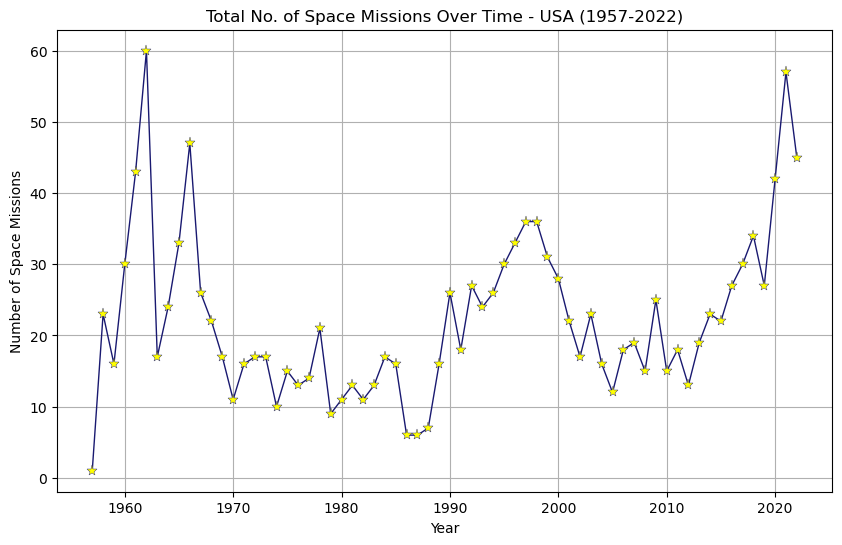

In [16]:
# Plot the total number of missions over time for USA launches
plt.figure(figsize=(10, 6))
usa_missions_grouped.plot(kind='line', marker='*', color='MidnightBlue', 
                                  markerfacecolor='yellow', linewidth=1, markersize=8, 
                                  markeredgewidth=0.3)
plt.title('Total No. of Space Missions Over Time - USA (1957-2022)')
plt.xlabel('Year')
plt.ylabel('Number of Space Missions')
plt.grid(True)

# Count the total number of missions for the USA
total_missions_usa = len(usa_missions_by_year)
print(f'Total number of Space Missions USA only (1957-2022): {total_missions_usa}')

plt.show()

## Total Space Missions Over Time - Rest of the World
### (excluding USA)

In [17]:
#Make a copy of the missions_df dataframe to avoid changing values when dropping 'Territory' column
rotw_missions_df = missions_df.copy()

In [18]:
# Create a DataFrame containing data for countries other than the USA
rotw_missions = rotw_missions_df[rotw_missions_df['Country'] != 'USA']

# Drop the 'Territory' column in the copy of the original DataFrame
rotw_missions_df = rotw_missions.drop(columns=['Territory'])

# Show the new cleaned DataFrame
rotw_missions_df.head()

,Company,Date,Time,Rocket,Mission,RocketStatus,MissionStatus,Day/Night Launch,Complex ID,Launch Site,Country
Year,,,,,,,,,,,
1957,RVSN USSR,1957-10-04,19:28:00,Sputnik 8K71PS,Sputnik-1,Retired,Success,Night,Site 1/5,Baikonur Cosmodrome,Kazakhstan
1957,RVSN USSR,1957-11-03,02:30:00,Sputnik 8K71PS,Sputnik-2,Retired,Success,Night,Site 1/5,Baikonur Cosmodrome,Kazakhstan
1958,RVSN USSR,1958-04-27,09:01:00,Sputnik 8A91,Sputnik-3 #1,Retired,Failure,Day,Site 1/5,Baikonur Cosmodrome,Kazakhstan
1958,RVSN USSR,1958-05-15,07:12:00,Sputnik 8A91,Sputnik-3 #2,Retired,Success,Day,Site 1/5,Baikonur Cosmodrome,Kazakhstan
1958,RVSN USSR,1958-09-23,07:40:00,Vostok,E-1 na A1 (Luna-1),Retired,Failure,Day,Site 1/5,Baikonur Cosmodrome,Kazakhstan


In [19]:
# To proceed and plot the rest of the world, excluding USA, over time
# Groupby the ROTW space missions DataFrame by year, and count the # of missions/year
rotw_missions_grouped = rotw_missions.groupby('Year').size()

Total number of Space Missions Worldwide excluding USA (1957-2022): 3158


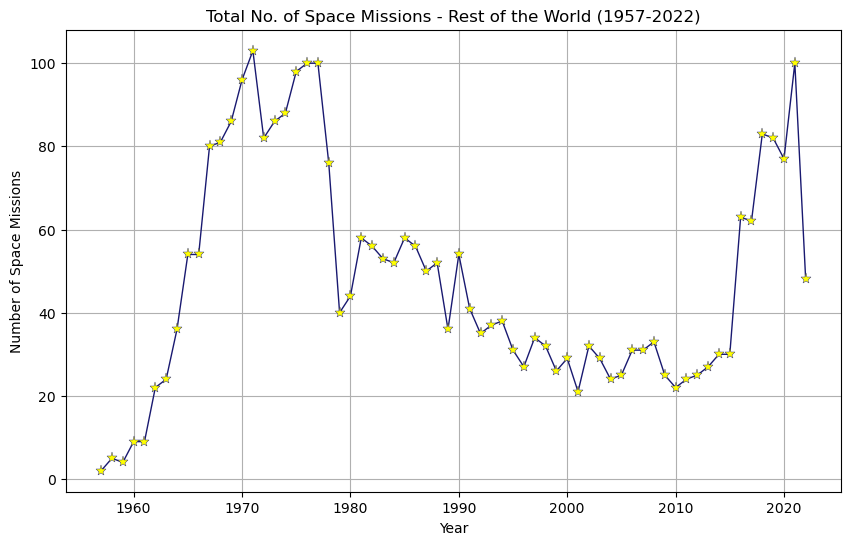

In [20]:
# Plot the total # of space missions over time for the rest of the world excluding USA
plt.figure(figsize=(10, 6))
rotw_missions_grouped.plot(kind='line', marker='*', color='MidnightBlue', 
                      markerfacecolor='yellow', linewidth=1, markersize=8, 
                      markeredgewidth=0.3)
plt.title('Total No. of Space Missions - Rest of the World (1957-2022)')
plt.xlabel('Year')
plt.ylabel('Number of Space Missions')
plt.grid(True)

# Count the total number of missions for the USA
total_missions_rotw = len(rotw_missions)
print(f'Total number of Space Missions Worldwide excluding USA (1957-2022): {total_missions_rotw}')


plt.show()

## Top 3 countries with the most space missions, and their changes over time

In [21]:
# Make a copy of the dataframe before resetting the index
top_3_countries = missions_df.copy()

In [22]:
# Group DataFrame by 'Country', count the number of missions, and reset the index
missions_per_country = top_3_countries['Country'].value_counts().reset_index(name='Missions')

# Rename columns for clarity
missions_per_country.columns = ['Country', 'Missions']

# Select the top 3 countries with the most missions
top_3_countries = missions_per_country.head(3)

print(top_3_countries)

      Country  Missions
0         USA      1472
1      Russia      1416
2  Kazakhstan       719


In [23]:
# Merge top 3 countries' data with the original DataFrame to get missions for those countries only
#This is the new DF 'top_3_countries_missions' is the one needed for the following graph
top_3_countries_missions = missions_df[missions_df['Country'].isin(top_3_countries['Country'])]

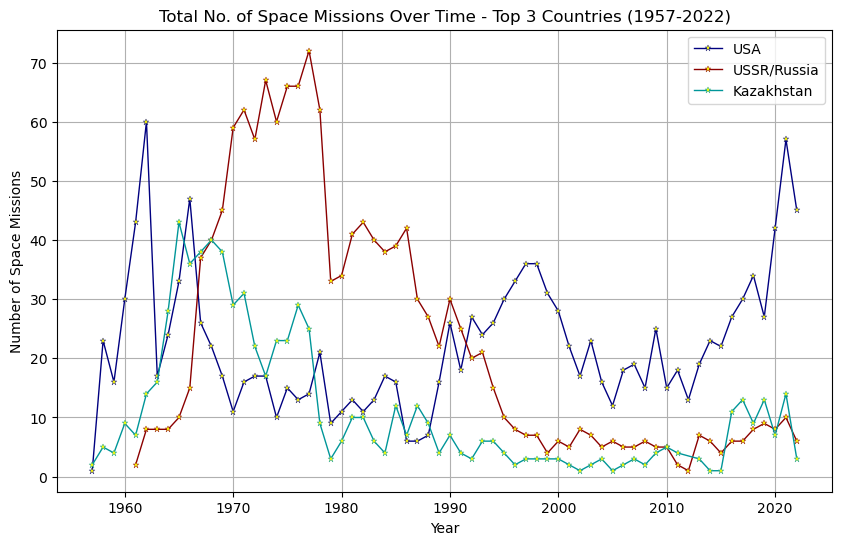

In [24]:
# Define colors and labels for each country
country_colors = {'USA': 'Navy', 'Russia': 'DarkRed', 'Kazakhstan': '#009699'}
country_labels = {'USA': 'USA', 'Russia': 'USSR/Russia', 'Kazakhstan': 'Kazakhstan'}

# Plot the total number of missions over time for the top 3 countries
plt.figure(figsize=(10, 6))

# Loop through each country in the top 3 and plot its missions over the years
for country in top_3_countries['Country']:
    country_missions = top_3_countries_missions[top_3_countries_missions['Country'] == country]
    country_missions_grouped = country_missions.groupby('Year').size()
    country_color = country_colors[country]
    country_label = country_labels[country]
    country_missions_grouped.plot(kind='line', marker='*', color=country_color, 
                                  markerfacecolor='yellow', linewidth=1, markersize=5, 
                                  markeredgewidth=0.3, label=country_label)

plt.title('Total No. of Space Missions Over Time - Top 3 Countries (1957-2022)')
plt.xlabel('Year')
plt.ylabel('Number of Space Missions')
plt.legend()  # Add legend to differentiate countries
plt.grid(True)

plt.show()

Space Race Timeline
-

--1947: Start of the Cold War

1957: (October 4th) USSR launches 'Sputnik', their first artificial satellite, which orbited the earth. (November 3rd) Soviet Union launches 'Sputnik2'.
This action was the starting point for the so called "Space Race" during the cold war, pressuring the US to also launch their own satellite into space.
1957: (December 6th) United states launches their own satellite 'Vanguard', which failed.
1958: The signing of the Space Act marked the birth of NASA.
1959: Both USA and USSR successfully launching moon flyby missions. However, USSR led the race
with their satelite Luna 2(September), being the first spacecraft to reach the moon's surface.

1961: (April 12th) Yuri Gagarin becomes first human in space in a USSR mission. 
(May 25th) JFK promises that USA would land a man on the moon, and safely bring him back, before the decade was over. This promise and it's vision, kickstarted project APOLLO.
During this time, the USA and the Soviet Union were at the height of the cold war. A major front in this war, was space. Therefore, putting a man on the moon would mean victory for the successful party.
(August 6th) USSR Long Duration Space Flight

1963: (September) JFK wants to join forces with the USSR on project APOLLO. 
(November) Death of JFK.
1964: (October 12th) USSR's first multi-person crew
1965: (March 18th) USSR's first Spacewalk
1966: (February 3rd) USSR's first soft landing of satellite 'Luna9' on the moon, no humans yet.
1969: (July 20th) "One small step for man, one giant leap for mankind." First man on the moon. Mission led by the USA, with 'Apollo 11'.

1970's
1970-197
1972: (December) USA's last crewed moon landing with 'Apollo 17'.
1973: Political risks prevent USA from sending more astronauts to the moon. Time,costs, and safety were a big factor.

--1991: End of the Cold War

2000: Blue Origin is founded by Jeff Bezos, founder of Amazon
2002: SpaceX company by Elon Musk is founded.
2012: Blue Origin flight testing 'New Shepard' rocket

Resources: 
Space Race Timeline obtained from: https://www.history.com/topics/cold-war/space-race
Astronauts explain why there hasn't been a human on the moon after 1972: https://www.businessinsider.com/moon-missions-why-astronauts-have-not-returned-2018-7?utm_source=copy-link&utm_medium=referral&utm_content=topbar

Blue Origin information obtained from: 
https://www.blueorigin.com/about-blue
https://en.wikipedia.org/wiki/Blue_Origin


Fun Fact:
NASA's project Artemis, started during 2012, and promises that maybe by 2025, there will be another moon landing mission with a diverse crew of astronauts.

There are factors that can contribute to lesser moon landings that involve humans in those missions. Aside of political and economical factors, the dangers that the lunar surface imposes to the astronauts could be a big reason why there are lesser missions of that sort. Dust factors, extream heat and freezing cold temperatures that make the lunar surface inhabitable, solar radiation, amongst other factors.


## Could NASA’s Budget over time, be affecting the Number of Missions?

In [25]:
#Display a sample of the budget csv file
budget_df.head()

,Year,2022 Constant Dollars(Millions)
0,1958,903
1,1959,1456
2,1960,3967
3,1961,7286
4,1962,12161


In [26]:
# Rename the column '2022 Constant Dollars(Millions)' to 'Budget'
budget_df.rename(columns={'2022 Constant Dollars(Millions)': 'Budget'}, inplace=True)

# Set the index of the DataFrame to the 'Year' column
budget_df.set_index('Year', inplace=True)

# Show a sample of the changed DataFrame
budget_df.head()

,Budget
Year,
1958,903
1959,1456
1960,3967
1961,7286
1962,12161


In [27]:
# Make a copy of the dataframe before resetting the index
US_budget_vs_missions = usa_missions_by_year.copy()

In [28]:
# Group by year and count the number of missions for each year
missions_per_year = US_budget_vs_missions.groupby('Year').size()

# Create a new DataFrame with the number of missions per year
new_missions_df = pd.DataFrame(missions_per_year, columns=['Number of Missions'])

# Display the DataFrame
new_missions_df

,Number of Missions
Year,
1957,1
1958,23
1959,16
1960,30
1961,43
...,...
2018,34
2019,27
2020,42


In [29]:
# Group by year and count the number of missions for each year
missions_per_year = US_budget_vs_missions.groupby('Year').size()

# Create a new DataFrame with the number of missions per year
new_missions_df = pd.DataFrame(missions_per_year, columns=['Number of Missions'])

# Merge the budget DataFrame with the new DataFrame on the 'Year' column
new_missions_df = pd.merge(new_missions_df, budget_df, how='left', on='Year')

# Drop rows with NaN values
new_missions_df.dropna(inplace=True)

# Display the DataFrame
new_missions_df

,Number of Missions,Budget
Year,,
1958,23,903.0
1959,16,1456.0
1960,30,3967.0
1961,43,7286.0
1962,60,12161.0
...,...,...
2016,27,23534.0
2017,30,23290.0
2018,34,24165.0


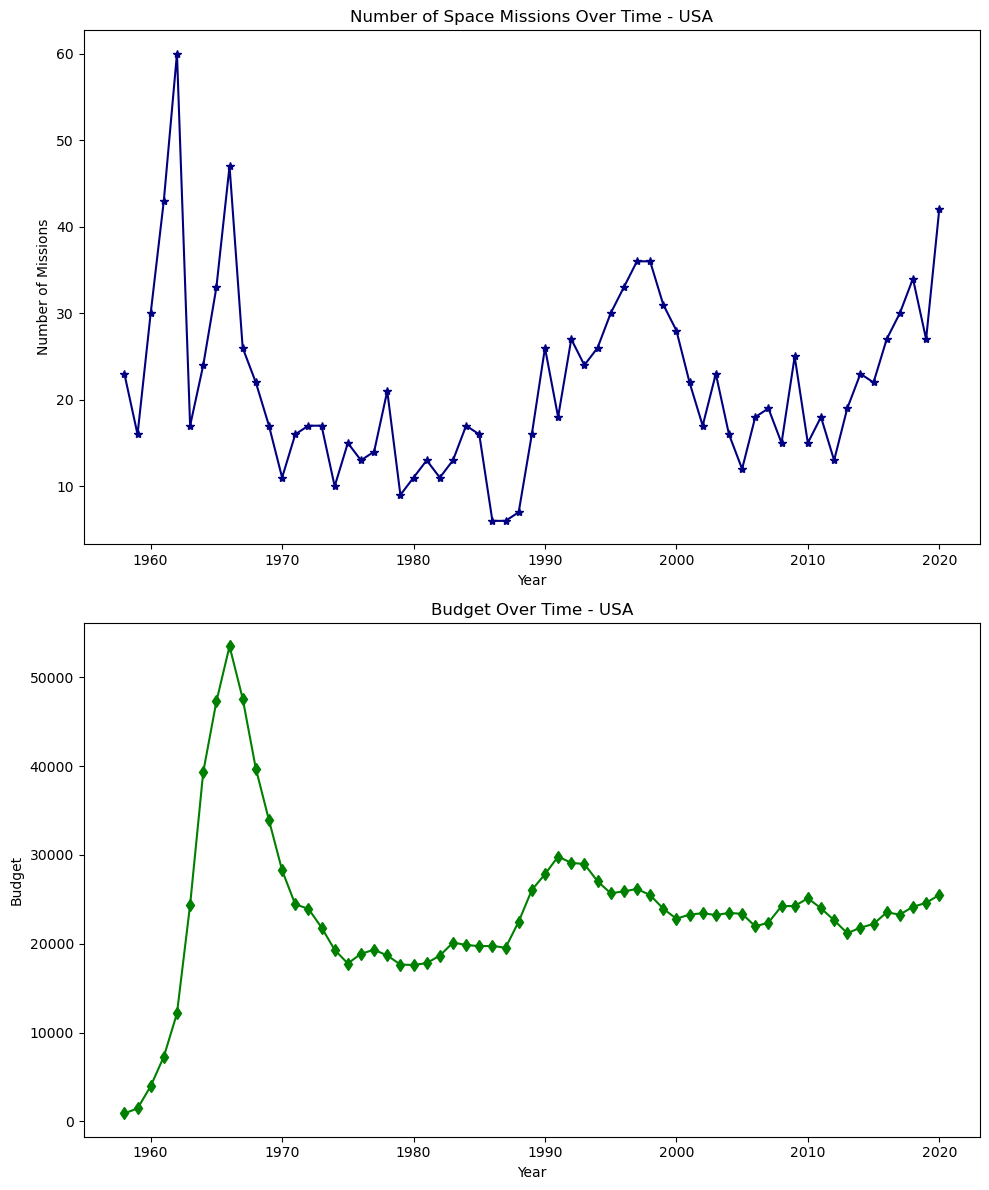

In [30]:
# Create a figure and axis objects with subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Define colors and labels for each variable
colors = {'Number of Missions': 'Navy', 'Budget': 'Green'}
labels = {'Number of Missions': 'Number of Missions', 'Budget': 'Budget'}

# Plot Number of Missions
ax1.plot(new_missions_df.index, new_missions_df['Number of Missions'], marker='*', color=colors['Number of Missions'])
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Missions')
ax1.set_title('Number of Space Missions Over Time - USA')

# Plot Budget
ax2.plot(new_missions_df.index, new_missions_df['Budget'], marker='d', color=colors['Budget'])
ax2.set_xlabel('Year')
ax2.set_ylabel('Budget')
ax2.set_title('Budget Over Time - USA')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

The trend of both timelines seems to be pretty related to one another.
Further analysis in relation to funding by private companies might be a factor towards space missions in the last decade.

CSV for Nasa's Historical Budget created using the following resources:
https://en.wikipedia.org/wiki/Budget_of_NASA